# Decoding Tags with `pupil-apriltags`

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from pupil_apriltags import Detector
from moms_apriltag import TagGenerator2,TagGenerator3

## Gen 2 Tags

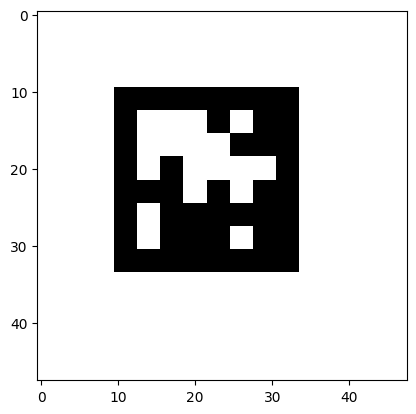

In [2]:
tg = TagGenerator2("tag36h11")
tag = tg.generate(4, scale=3)
r,c = tag.shape
im = 255*np.ones((2*r,2*c),dtype=np.uint8)
im[10:10+r,10:10+c] = tag

plt.imshow(im, cmap="gray");
# plt.axis("off");

In [3]:
at_detector = Detector(
   families="tag36h11",
   nthreads=1,
   quad_decimate=1.0,
   quad_sigma=0.0,
   refine_edges=1,
   decode_sharpening=0.25,
   debug=0
)

at_detector.detect(im)

[Detection object:
 tag_family = b'tag36h11'
 tag_id = 4
 hamming = 0
 decision_margin = 120.78947448730469
 homography = [[ 1.19999991e+01  1.46957605e-15  2.18749995e+01]
  [-1.34607157e-06  1.20000000e+01  2.18750000e+01]
  [-3.97364299e-08 -4.86630916e-24  1.00000000e+00]]
 center = [21.87499952 21.875     ]
 corners = [[ 9.875      33.875     ]
  [33.875      33.875     ]
  [33.875       9.87499905]
  [ 9.875       9.87500095]]
 pose_R = None
 pose_t = None
 pose_err = None]

## Gen 3 Tags

The detector is painfully *slow*

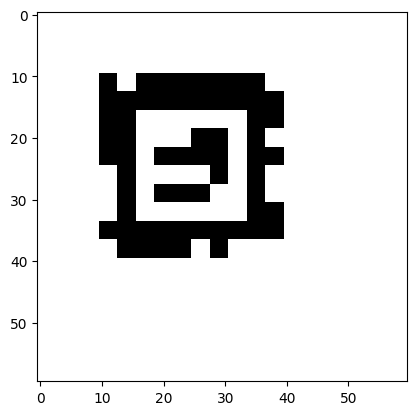

In [49]:
tg = TagGenerator3("tagStandard52h13")
tag = tg.generate(4, scale=3)
r,c = tag.shape
im = 255*np.ones((2*r,2*c),dtype=np.uint8)
im[10:10+r,10:10+c] = tag

plt.imshow(im, cmap="gray");

In [57]:
at_detector = Detector(
   families="tagStandard52h13",
   nthreads=1,
   quad_decimate=1.0,
   quad_sigma=0.0,
   refine_edges=1,
   decode_sharpening=0.25,
   debug=0
)

at_detector.detect(im)

[Detection object:
 tag_family = b'tagStandard52h13'
 tag_id = 4
 hamming = 0
 decision_margin = 121.125
 homography = [[ 9.06861061e+00 -1.23502275e-01  2.49299700e+01]
  [ 1.23580570e-01  8.88409438e+00  2.48674033e+01]
  [ 3.64813491e-03 -3.64582361e-03  1.00000000e+00]]
 center = [24.92996996 24.86740335]
 corners = [[15.85349178 33.875     ]
  [33.875      33.875     ]
  [33.875      15.99025726]
  [15.98489857 15.85976505]]
 pose_R = None
 pose_t = None
 pose_err = None]